# **Task \#2**: Machine Learning MC886/MO444
##**Classical Machine Learning Techniques**##

In [293]:
print('Marcelo Antunes Soares Fantini' + ' RA 108341')
print('Rubens de Castro Pereira' + ' RA 217146') 

Marcelo Antunes Soares Fantini RA 108341
Rubens de Castro Pereira RA 217146


## Objective:

To explore **Linear Regression** and **Logistic Regression** alternatives and come up with the best possible model for the problems, at the same time avoiding overfitting (and also underfitting). In this work, we will train a model that use medical records from patients to predict patient survival.

## Dataset

The purpose of this dataset is to predict the patients' survival from medical records. These data is available in [Google Sheets](https://docs.google.com/spreadsheets/d/18-PlYBnwD7yJoyGJOsaB5Wydc2iTG9sSnbuuV4t4efE/edit?usp=sharing), consisting in 299 patients with heart failure collected in 2015. 

**Data Dictionary**:

- **AGE**: Age of the patient (years);

- **ANAEMIA**: Decrease of red blood cells or hemoglobin (boolean);

- **HIGH BLODD PRESSURE**: If the patient has hypertension (boolean);

- **CREATININE PHOSPHOKINASE (CPK)**: Level of the CPK enzyme in the blood (mcg/L);

- **DIABETES**: If the patient has diabetes (boolean);

- **EJECTION FRACTION**: Percentage of blood leaving the heart at each contraction (percentage);

- **PLATELETS**: Platelets in the blood (kiloplatelets/mL);

- **SEX**: Woman or man (binary);

- **SERUM CREATININE**: Level of serum creatinine in the blood (mg/dL);

- **SERUM SODIUM**: Level of serum sodium in the blood (mEq/L);

- **SMOKING**: If the patient smokes or not (boolean);

- **TIME**: Follow-up period (days);

- **DEATH EVENT**: If the patient deceased during the follow-up period (boolean);

More information about the dataset: *Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5*

In [294]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler 

df = pd.read_csv('data/heart_dataset.csv').drop(columns=['time'])
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,No,582.0,No,20.0,1.0,265000.00,1.9,130.0,Female,No,1
1,55.0,No,7861.0,No,38.0,0.0,263358.03,1.1,136.0,Female,No,1
2,65.0,No,146.0,No,20.0,0.0,162000.00,1.3,129.0,Female,Yes,1
3,50.0,Yes,111.0,No,20.0,0.0,210000.00,1.9,137.0,Female,No,1
4,NaN,Yes,160.0,Yes,20.0,0.0,327000.00,2.7,116.0,Male,No,1


### Analysis

(0.5 points) This part of the assignmente aims to analyze the dataset and preprocess the data for the models. To do so, a fews things to be considered: 


*   Are there any outliers?
*   Are there missing values?
*   How will you handle categorical variables?

___
**Item 1) Are there any outliers?**

We used the some tips in https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/ to help us to build the dataset analysis.

Evaluating the summary statistics of the dataset for each column:

1. age: no outliers, because the min and max values are around the mean value
2. creatinine_phosphokinase: **we have outliers because the max value**
   - mean: 584.801347	
   - min: 23.000000       (3.93% of the mean)
   - max: 7861.000000     (1344% of the mean)
3. ejection_fraction: **no outliers**
   - mean: 38.003367
   - min: 14.000000       (36.83% of the mean)
   - max: 80.000000       (210.0% of the mean)
4. platelets: **we have outliers because the max value**
   - mean: 263387.475405
   - min: 25100.000000    (9.53% of the mean)
   - max: 850000.000000   (322.71% of the mean)
5. serum_creatinine: **we have outliers because the max value**
   - mean: 1.397542
   - min: 0.500000        (25.04% of the mean)
   - max: 9.400000        (672.61% of the mean)
6. serum_sodium: **no outliers**
   - mean: 136.620805
   - min: 113.000000      (82.71% of the mean)
   - max: 148.000000      (108.33% of the mean)

In [295]:
# TODO: Preprocessing Dataset.

# looking for outliers in dataset
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
count,295.000000,297.000000,297.000000,297.000000,296.000000,297.000000,298.000000,299.00000
mean,60.946895,584.801347,38.003367,0.353535,263387.475405,1.397542,136.620805,0.32107
std,11.896148,972.874154,11.805432,0.478874,98295.456485,1.036956,4.419177,0.46767
min,40.000000,23.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.00000
25%,51.000000,118.000000,30.000000,0.000000,211750.000000,0.900000,134.000000,0.00000
50%,60.000000,250.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,0.00000
75%,70.000000,582.000000,45.000000,1.000000,304000.000000,1.400000,140.000000,1.00000
max,95.000000,7861.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.00000


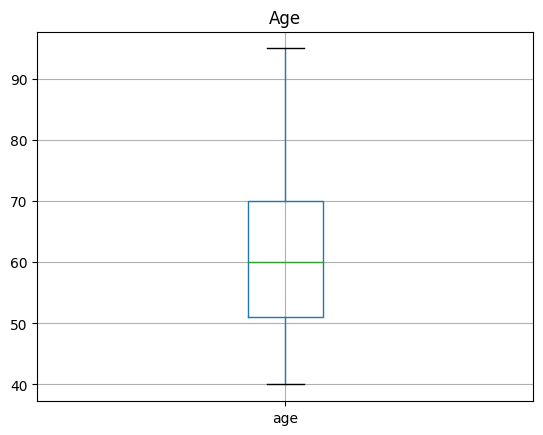

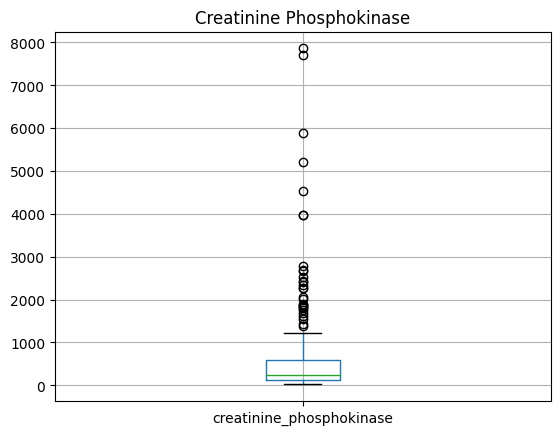

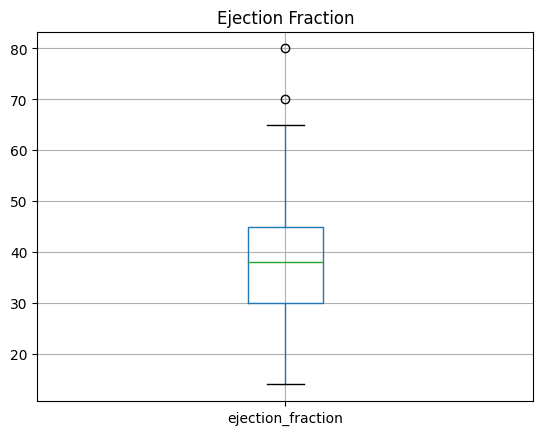

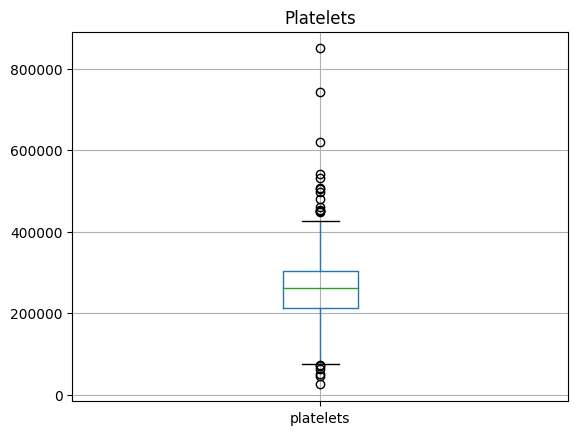

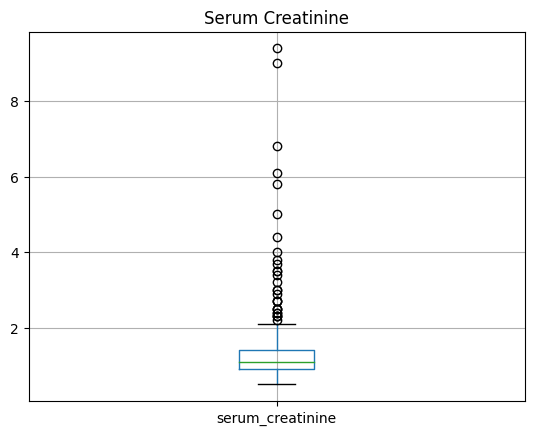

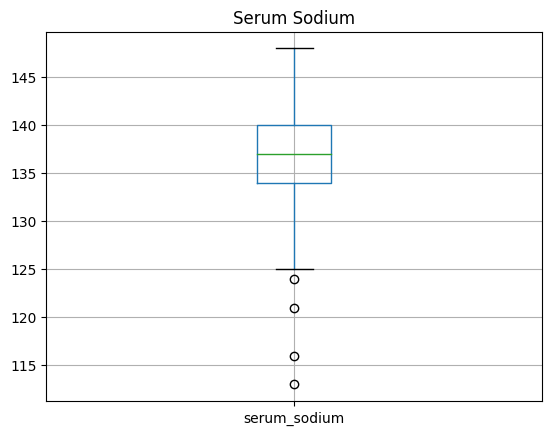

In [296]:
# showing plots to discover outliers 

# Plot the box plot of single column of DataFrame
b_plot = df.boxplot(column = ['age'])
b_plot.plot()
plt.title('Age')
plt.show() 

b_plot = df.boxplot(column = ['creatinine_phosphokinase'])
b_plot.plot()
plt.title('Creatinine Phosphokinase')
plt.show() 

b_plot = df.boxplot(column = ['ejection_fraction'])
b_plot.plot()
plt.title('Ejection Fraction')
plt.show() 

b_plot = df.boxplot(column = ['platelets'])
b_plot.plot()
plt.title('Platelets')
plt.show() 

b_plot = df.boxplot(column = ['serum_creatinine'])
b_plot.plot()
plt.title('Serum Creatinine')
plt.show() 

b_plot = df.boxplot(column = ['serum_sodium'])
b_plot.plot()
plt.title('Serum Sodium')
plt.show()


In [297]:
# showing plots for the outliers by using the pyplot functions 

plt.figure(1)
fig = px.box(df, y='age', 
             title='Age', 
             labels={
                    "age": "Age"                    
                    }
            )
fig.show()

plt.figure(2)
fig = px.box(df, y='creatinine_phosphokinase', 
             title='Creatinine Phosphokinase', 
             labels={
                    "creatinine_phosphokinase": "Creatinine Phosphokinase"                    
                    }
            )
fig.show()

plt.figure(3)
fig = px.box(df, y='ejection_fraction')
fig = px.box(df, y='ejection_fraction', 
             title='Ejection Fraction', 
             labels={
                    "ejection_fraction": "Ejection Fraction"                    
                    }
            )
fig.show()

plt.figure(4)
fig = px.box(df, y='platelets', 
             title='Platelets', 
             labels={
                    "platelets": "Platelets"                    
                    }
            )
fig.show()

plt.figure(5)
fig = px.box(df, y='serum_creatinine', 
             title='Serum Creatinine', 
             labels={
                    "serum_creatinine": "Serum Creatinine"                    
                    }
            )
fig.show()

plt.figure(6)
fig = px.box(df, y='serum_sodium', 
             title='Serum Sodium', 
             labels={
                    "serum_sodium": "Serum Sodium"                    
                    }
            )
fig.show()


___

**Item 2) Are there missing values?**

Yes, there are about 24 rows with columns where any value is missing or there not exist.


In [298]:
# getting the NaN values in the columns as missing values 
df[df['creatinine_phosphokinase'].isna()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
253,70.0,No,NaN,Yes,35.0,1.0,236000.0,1.2,132.0,Male,No,0
298,50.0,No,NaN,No,45.0,0.0,395000.0,1.6,136.0,Female,Yes,0


In [299]:
# getting the NaN values in the columns as missing values 
df[df['ejection_fraction'].isna()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
254,53.0,Yes,446.0,No,NaN,1.0,263358.03,1.0,139.0,Female,No,0
281,70.0,No,582.0,NaN,NaN,0.0,51000.00,2.7,136.0,Female,Yes,0


In [300]:
# getting the NaN values in the columns as missing values 
df[df['high_blood_pressure'].isna()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
273,42.0,No,64.0,No,40.0,NaN,189000.0,0.7,140.0,Female,No,0
274,60.0,Yes,257.0,Yes,30.0,NaN,150000.0,1.0,137.0,Female,Yes,0


In [301]:
# getting the NaN values in the columns as missing values 
df[df['platelets'].isna()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
236,75.0,No,119.0,No,50.0,1.0,NaN,1.1,148.0,Female,No,0
288,65.0,No,892.0,Yes,35.0,0.0,NaN,1.1,142.0,Male,No,0
295,NaN,No,1820.0,No,38.0,0.0,NaN,1.2,139.0,Male,No,0


In [302]:
# getting the NaN values in the columns as missing values 
df[df['serum_creatinine'].isna()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
259,53.0,No,56.0,No,50.0,0.0,308000.0,NaN,135.0,Female,Yes,0
280,70.0,No,2695.0,Yes,40.0,0.0,241000.0,NaN,137.0,Female,No,0


In [303]:
# getting the NaN values in the columns as missing values 
df[df['serum_sodium'].isna()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
260,55.0,No,66.0,No,40.0,0.0,203000.0,1.0,NaN,Female,No,0


In [304]:
# getting all NaN values in the columns as missing values 
frames = [ 
    df[df['age'].isna()],
    df[df['anaemia'].isna()],
    df[df['creatinine_phosphokinase'].isna()],
    df[df['diabetes'].isna()],
    df[df['ejection_fraction'].isna()],
    df[df['high_blood_pressure'].isna()],
    df[df['platelets'].isna()],
    df[df['serum_creatinine'].isna()],
    df[df['serum_sodium'].isna()],
    df[df['sex'].isna()],
    df[df['smoking'].isna()],
    df[df['DEATH_EVENT'].isna()]
]

df_missing_values = pd.concat(frames, ignore_index=False)
df_missing_values.sort_index()
df_missing_values

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
4,NaN,Yes,160.0,Yes,20.0,0.0,327000.00,2.7,116.0,Male,No,1
17,NaN,No,582.0,No,14.0,0.0,166000.00,0.8,127.0,Female,No,1
295,NaN,No,1820.0,No,38.0,0.0,NaN,1.2,139.0,Male,No,0
296,NaN,No,2060.0,Yes,60.0,0.0,742000.00,0.8,138.0,Male,No,0
294,62.0,NaN,61.0,Yes,38.0,1.0,155000.00,1.1,143.0,Female,Yes,0
253,70.0,No,NaN,Yes,35.0,1.0,236000.00,1.2,132.0,Male,No,0
298,50.0,No,NaN,No,45.0,0.0,395000.00,1.6,136.0,Female,Yes,0
276,70.0,No,618.0,NaN,35.0,0.0,327000.00,1.1,142.0,Male,No,0
281,70.0,No,582.0,NaN,NaN,0.0,51000.00,2.7,136.0,Female,Yes,0
254,53.0,Yes,446.0,No,NaN,1.0,263358.03,1.0,139.0,Female,No,0


In [305]:
print(f'-'*60)
print(f'Number of rows with missing values in any columns: {len(df_missing_values)} ')
print(f'-'*60)

------------------------------------------------------------
Number of rows with missing values in any columns: 24 
------------------------------------------------------------


___
**Item 3) How will you handle categorical variables?**

The categorical values must to be handled converting the value labels into numbers where each label are converted to a specific integer number creating classes. So, this values are grouped and we count the number of indivduals in each group when it's necessary.

In this dataset, we have the following columns with categorical variables:
1. anaemia: Yes or No
2. high_blood_pressure: 0 or 1
3. diabetes: 0 or 1
4. sex: Male or Female
5. smoking: Yes or No
6. DEATH_EVENT: 0 or 1

In [306]:
# Handling categorical variables 

# 1. anaemia: Yes or No
# 2. high_blood_pressure: 0 or 1
# 3. diabetes: 0 or 1
# 3. sex: Male or Female
# 4. smoking: Yes or No
# 5. DEATH_EVENT: 0 or 1

print(f'#'*40)
print(f'Categorical Values of the dataset')
print(f'#'*40)
print()

s_anaemia = pd.Series(df['anaemia'], dtype='category')
print(f'-'*30)
print(f'Anaemia')
print(s_anaemia)
print()

s_high_blood_pressure = pd.Series(df['high_blood_pressure'], dtype='category')
print(f'-'*30)
print(f'High Blood Pressure')
print(s_high_blood_pressure)
print()

s_diabetes = pd.Series(df['diabetes'], dtype='category')
print(f'-'*30)
print(f'Diabetes')
print(s_diabetes)
print()

s_sex = pd.Series(df['sex'], dtype='category')
print(f'-'*30)
print(f'Sex')
print(s_sex)
print()

s_smoking = pd.Series(df['smoking'], dtype='category')
print(f'-'*30)
print(f'Smoking')
print(s_smoking)
print()

s_DEATH_EVENT = pd.Series(df['DEATH_EVENT'], dtype='category')
print(f'-'*30)
print(f'Death Event indicator')
print(s_DEATH_EVENT)
print()


########################################
Categorical Values of the dataset
########################################

------------------------------
Anaemia
0       No
1       No
2       No
3      Yes
4      Yes
      ... 
294    NaN
295     No
296     No
297     No
298     No
Name: anaemia, Length: 299, dtype: category
Categories (2, object): ['No', 'Yes']

------------------------------
High Blood Pressure
0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
294    1.0
295    0.0
296    0.0
297    0.0
298    0.0
Name: high_blood_pressure, Length: 299, dtype: category
Categories (2, float64): [0.0, 1.0]

------------------------------
Diabetes
0       No
1       No
2       No
3       No
4      Yes
      ... 
294    Yes
295     No
296    Yes
297     No
298     No
Name: diabetes, Length: 299, dtype: category
Categories (2, object): ['No', 'Yes']

------------------------------
Sex
0      Female
1      Female
2      Female
3      Female
4        Male
        ...  
294    Fema

C:\Users\Rubens\AppData\Local\Temp\ipykernel_18048\984686331.py:24: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



### Properly preparing the dataset for the next steps

The following steps are necessary to prepare dataset for the next steps:
1. setting cells with missing values with zero;
2. removing outliers; 
3. converting categorical values into numerical values.

In [307]:
# setting cells with missing values (NaN) with zero;
df.fillna(0, inplace=True)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,No,582.0,No,20.0,1.0,265000.00,1.9,130.0,Female,No,1
1,55.0,No,7861.0,No,38.0,0.0,263358.03,1.1,136.0,Female,No,1
2,65.0,No,146.0,No,20.0,0.0,162000.00,1.3,129.0,Female,Yes,1
3,50.0,Yes,111.0,No,20.0,0.0,210000.00,1.9,137.0,Female,No,1
4,0.0,Yes,160.0,Yes,20.0,0.0,327000.00,2.7,116.0,Male,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.0,Yes,38.0,1.0,155000.00,1.1,143.0,Female,Yes,0
295,0.0,No,1820.0,No,38.0,0.0,0.00,1.2,139.0,Male,No,0
296,0.0,No,2060.0,Yes,60.0,0.0,742000.00,0.8,138.0,Male,No,0
297,45.0,No,2413.0,No,38.0,0.0,140000.00,1.4,140.0,Female,Yes,0


In [308]:
# removing outliers
 
# finding the InterQuartile Range
# the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR
def find_outliers_IQR(df): 
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1

    print('def find_outliers_IQR(df):')
    print(q1)
    print(f'-'*30)
    print(q3)
    print(f'-'*30)
    print(IQR)
    print(f'-'*30)

    outliers_data = df[ ( (df<(q1-1.5*IQR) )  |  (df>(q3+1.5*IQR)) )]
    return outliers_data


# getting the outliers 
creatinine_phosphokinase_outliers = find_outliers_IQR(df['creatinine_phosphokinase'])
print(f'Number of outliers of creatinine_phosphokinase_outliers: {len(creatinine_phosphokinase_outliers)}')
print()
print(creatinine_phosphokinase_outliers)

ejection_fraction_outliers = find_outliers_IQR(df['ejection_fraction'])
print(f'Number of outliers of ejection_fraction: {len(ejection_fraction_outliers)}')
print()
print(ejection_fraction_outliers)

platelets_outliers = find_outliers_IQR(df['creatinine_phosphokinase'])
print(f'Number of outliers of platelets: {len(platelets_outliers)}')
print()
print(platelets_outliers)

serum_creatinine_outliers = find_outliers_IQR(df['serum_creatinine'])
print(f'Number of outliers of serum_creatinine: {len(serum_creatinine_outliers)}')
print()
print(serum_creatinine_outliers)

serum_sodium_outliers = find_outliers_IQR(df['serum_sodium'])
print(f'Number of outliers of serum_sodium: {len(serum_sodium_outliers)}')
print()
print(serum_sodium_outliers)


def find_outliers_IQR(df):
115.0
------------------------------
582.0
------------------------------
467.0
------------------------------
Number of outliers of creatinine_phosphokinase_outliers: 29

1      7861.0
38     2656.0
46     1380.0
52     3964.0
60     7702.0
72     5882.0
103    5209.0
107    1876.0
130    1808.0
134    4540.0
139    1548.0
147    1610.0
149    2261.0
153    1846.0
163    2334.0
164    2442.0
171    3966.0
176    1419.0
187    1896.0
200    1767.0
208    2281.0
227    2794.0
246    2017.0
250    2522.0
280    2695.0
283    1688.0
295    1820.0
296    2060.0
297    2413.0
Name: creatinine_phosphokinase, dtype: float64
def find_outliers_IQR(df):
30.0
------------------------------
45.0
------------------------------
15.0
------------------------------
Number of outliers of ejection_fraction: 4

64     80.0
217    70.0
254     0.0
281     0.0
Name: ejection_fraction, dtype: float64
def find_outliers_IQR(df):
115.0
------------------------------
582.0
-----------

In [309]:
# removing outliers
 
# finding the InterQuartile Range
# the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR
def drop_outliers_IQR(df): 
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1

    print('def find_outliers_IQR(df):')
    print(q1)
    print(f'-'*30)
    print(q3)
    print(f'-'*30)
    print(IQR)
    print(f'-'*30)

    not_outliers_data = df[ ~( (df<(q1-1.5*IQR) )  |  (df>(q3+1.5*IQR)) ) ]

    print(not_outliers_data)
    print(f'-'*30)

    outliers_data_dropped = not_outliers_data.dropna().reset_index()
    print(outliers_data_dropped)
    print(f'-'*30)

    return outliers_data_dropped

# getting the outliers 
# creatinine_phosphokinase_outliers = find_outliers_IQR(df['creatinine_phosphokinase'])
# print(f'Number of outliers of creatinine_phosphokinase_outliers: {len(creatinine_phosphokinase_outliers)}')
# print()
# print(creatinine_phosphokinase_outliers)

########### ATTENTION: THIS METHOD IS REMOVING MORE ROWS THAN NECESSARY 
outliers_data_dropped = drop_outliers_IQR(df)
print(f'Number of outliers: {len(outliers_data_dropped)}')
print()
print(outliers_data_dropped)


def find_outliers_IQR(df):
age                             50.0
creatinine_phosphokinase       115.0
ejection_fraction               30.0
high_blood_pressure              0.0
platelets                   210000.0
serum_creatinine                 0.9
serum_sodium                   134.0
DEATH_EVENT                      0.0
Name: 0.25, dtype: float64
------------------------------
age                             70.0
creatinine_phosphokinase       582.0
ejection_fraction               45.0
high_blood_pressure              1.0
platelets                   303500.0
serum_creatinine                 1.4
serum_sodium                   140.0
DEATH_EVENT                      1.0
Name: 0.75, dtype: float64
------------------------------
age                            20.0
creatinine_phosphokinase      467.0
ejection_fraction              15.0
high_blood_pressure             1.0
platelets                   93500.0
serum_creatinine                0.5
serum_sodium                    6.0
DEATH_EVENT  

C:\Users\Rubens\AppData\Local\Temp\ipykernel_18048\3362479217.py:6: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Rubens\AppData\Local\Temp\ipykernel_18048\3362479217.py:7: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Rubens\AppData\Local\Temp\ipykernel_18048\3362479217.py:18: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [310]:
# converting categorical values into numerical values

# setting "No" as 0 and "Yes" as 1
df['anaemia'] = pd.Series(np.where(df['anaemia'].values == 'Yes', 1, 0), df.index)
df['diabetes'] = pd.Series(np.where(df['diabetes'].values == 'Yes', 1, 0), df.index)
df['smoking'] = pd.Series(np.where(df['smoking'].values == 'Yes', 1, 0), df.index)

# setting "Male" as 0 and "Female" as 1
df['sex'] = pd.Series(np.where(df['sex'].values == 'Female', 1, 0), df.index)

#  showing dataframe 
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1.0,265000.00,1.9,130.0,1,0,1
1,55.0,0,7861.0,0,38.0,0.0,263358.03,1.1,136.0,1,0,1
2,65.0,0,146.0,0,20.0,0.0,162000.00,1.3,129.0,1,1,1
3,50.0,1,111.0,0,20.0,0.0,210000.00,1.9,137.0,1,0,1
4,0.0,1,160.0,1,20.0,0.0,327000.00,2.7,116.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.0,1,38.0,1.0,155000.00,1.1,143.0,1,1,0
295,0.0,0,1820.0,0,38.0,0.0,0.00,1.2,139.0,0,0,0
296,0.0,0,2060.0,1,60.0,0.0,742000.00,0.8,138.0,0,0,0
297,45.0,0,2413.0,0,38.0,0.0,140000.00,1.4,140.0,1,1,0


## Linear Regression

(0.75 points) This part of the assigment aims to predict the level of serum creatinine in the blod based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: serum_creatinine**.

Obs: drop the DEATH_EVENT column.

___
**Item 1) Do we need to split the data into train, valid and test? How?**

Yes, we need to split the dataset. We split all the dataset by a random criteria and split proportionally the dataset type. 

We used the following criteria top split the dataset:
1. Trainning data: 70%
2. Validation data: 20%
3. Test data: 10%

In [311]:
# TODO: Split data and normalize. You can use scikit-learn libraries.

# dropping the DEATH_EVENT column from the original dataset 
df_linear_regression = df.drop(columns=['DEATH_EVENT'])

# print(f'-'*70)
# print(f'Dataset before split')
# print()
# print(df_linear_regression.head(5))
# print()

# setting features and target data 
X_df = df_linear_regression.drop(columns=['serum_creatinine'])
y_df = df_linear_regression['serum_creatinine']

# spliting dataset according criterias
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(
    X_df, 
    y_df,
    train_size=0.9,
    test_size=0.1, 
    random_state=1
    )

X_train_df, X_valid_df, y_train_df, y_valid_df = train_test_split(
    X_train_df, 
    y_train_df,
    train_size=0.77,
    test_size=0.23, 
    random_state=1
    )

print(f'-'*70)
print()
print(f'Statistic of splitted dataset:')
print()
print(f'Training size   : {len(X_train_df)} - {(len(X_train_df) / len(df_linear_regression))*100:.2f}%')
print(f'Validation size : {len(X_valid_df)}  - {(len(X_valid_df) / len(df_linear_regression))*100:.2f}%')
print(f'Testing size    : {len(X_test_df)}  - {(len(X_test_df) / len(df_linear_regression))*100:.2f}%')
print(f'Dataset size    : {len(df_linear_regression)} - 100%')

# print()
# print(X_test.head(5))
# print()
# print(Y_test.head(5))


----------------------------------------------------------------------

Statistic of splitted dataset:

Training size   : 207 - 69.23%
Validation size : 62  - 20.74%
Testing size    : 30  - 10.03%
Dataset size    : 299 - 100%


___
**Item 2) Do we need to normalize the data? How? The normalization is equal to train, valid and test split?**

Yes, we need to normalize the data, because the feature scales are pretty different one each other. So, we normalized just the features with different scales.

In [312]:
# normalize features necessary 

# calculating the normalization for the columns selected 
def normalize_min_max_columns(df, columns):
    for column in columns:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

    # returning normalized data
    return df

# setting the columns to normalize 
columns = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium']

# normalizing features
X_train_normalized_df = normalize_min_max_columns(X_train_df, columns)
X_valid_normalized_df = normalize_min_max_columns(X_valid_df, columns)
X_test_normalized_df = normalize_min_max_columns(X_test_df, columns)

print()
print(f'-'*50)
print("Normalized Training data")
print(f'-'*50)
print(X_train_normalized_df)
print(y_train_df)

print()
print(f'-'*50)
print("Normalized Validation data")
print(f'-'*50)
print(X_valid_normalized_df)
print(y_valid_df)

print()
print(f'-'*50)
print("Normalized Testing data")
print(f'-'*50)
print(X_test_normalized_df)
print(y_test_df)



--------------------------------------------------
Normalized Training data
--------------------------------------------------
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
128  61.0        0                  0.031548         0           0.461538   
129  53.0        1                  0.034347         1           0.538462   
207  85.0        0                  0.026969         0           0.584615   
183  75.0        0                  0.012594         0           0.584615   
123  60.0        1                  0.074036         0           0.461538   
..    ...      ...                       ...       ...                ...   
162  63.0        1                  0.074036         0           0.615385   
254  53.0        1                  0.056736         0           0.000000   
233  53.0        1                  0.089938         0           0.584615   
49   57.0        1                  0.016410         0           0.461538   
158  85.0        1       

### Activities

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) to check the importance of each feature. 

> *   Do we need all the features to predict the target value?
> *   What happens if we drop the low correlation features?

In [347]:
# getting array from dataframe
X_train = np.array(X_train_df)
y_train = np.array(y_train_df)
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')

X_valid = np.array(X_valid_df)
y_valid = np.array(y_valid_df)
print(f'X_valid.shape: {X_valid.shape}')
print(f'y_valid.shape: {y_valid.shape}')

X_test  = np.array(X_test_df)
y_test  = np.array(y_test_df)
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')


print(f'{X_train_df}')
print(f'===========================')
print(f'{X_train}')
print(f'{X_train.shape}')


X_train.shape: (207, 10)
y_train.shape: (207,)
X_valid.shape: (62, 10)
y_valid.shape: (62,)
X_test.shape: (30, 10)
y_test.shape: (30,)
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
128  61.0        0                  0.031548         0           0.461538   
129  53.0        1                  0.034347         1           0.538462   
207  85.0        0                  0.026969         0           0.584615   
183  75.0        0                  0.012594         0           0.584615   
123  60.0        1                  0.074036         0           0.461538   
..    ...      ...                       ...       ...                ...   
162  63.0        1                  0.074036         0           0.615385   
254  53.0        1                  0.056736         0           0.000000   
233  53.0        1                  0.089938         0           0.584615   
49   57.0        1                  0.016410         0           0.461538   
158  85.0        1

___
1.1 Do we need all the features to predict the target value?

According by the mutual_info_regression function (skitlearn), we can observe the mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The features (variable) are **age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_sodium, sex, and smoking**. The target value is **serum_creatinine**. 

We selected just variables with numerical values to evaluate the mutual information regression: **age, creatinine_phosphokinase, ejection_fraction, platelets, and serum_sodium**.

In [314]:
from sklearn.feature_selection import mutual_info_regression

# TODO: Feature selection.
mutual_info_regression = mutual_info_regression(
    X_train_df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium']], 
    y_train_df)
print(mutual_info_regression)

mutual_info_regression = pd.Series(mutual_info_regression)
mutual_info_regression.index = X_train_df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium']].columns
mir = mutual_info_regression.sort_values(ascending=False)
print(mir)

[0.09397008 0.00182671 0.         0.06994392 0.19966682]
serum_sodium                0.199667
age                         0.093970
platelets                   0.069944
creatinine_phosphokinase    0.001827
ejection_fraction           0.000000
dtype: float64


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

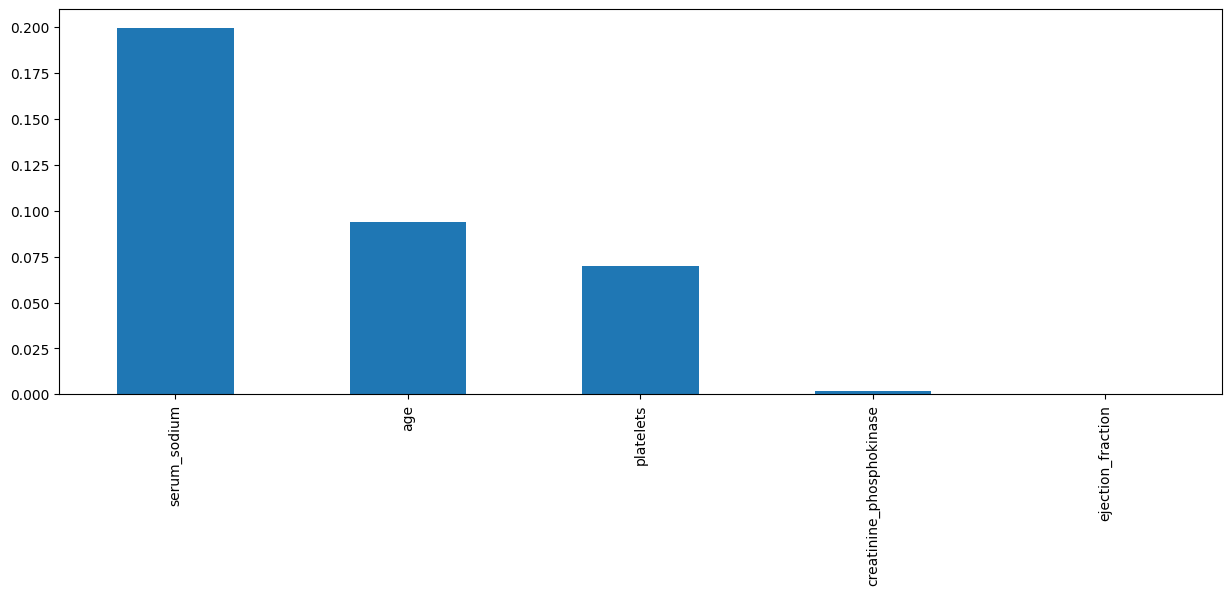

In [315]:
mutual_info_regression.sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.show()

___
1.2 What happens if we drop the low correlation features?

The features with low correlation has low impact in the linear regression due to low contribution in the linear regression. But if we dropped them, maybe the regression coefficients of the remaining features may change leading us to a different interpretation of the coefficients.

> What are the conclusions? (1-2 paragraphs)


**TODO**

2. (2.0 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org).

In [316]:
# TODO: MSE Loss. You cannot use scikit-learn!!

# Compute Mean Squared Error (MSE) between the known and predicted values.
def MSE(y_true, y_pred):
  # calculating MSE
  mse = np.mean((y_true - y_pred) ** 2)

  # returning MSE between known y and predicted y
  return mse 

In [348]:
# TODO: Linear Regression. Implement your solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries!!
class LinearRegression():
  def __init__(self, learning_rate=-1, max_iter=-1):
    self.max_iter         = max_iter
    self.learning_rate    = learning_rate
    self.weights          = None
    self.bias             = None

  def predict(self, X):
    # calculating y predict 
    y_predict = np.dot(X, self.weights) + self.bias

    # returning y_predict 
    return y_predict

  def fit(self, X, y):

    # setting the initial parameters 
    number_of_samples, number_of_features = X.shape
    self.weights = np.zeros((number_of_features, 1))
    self.bias = 0

    # calculating the gradient descent 
    for i in range(self.max_iter):
        # calculating y predict 
        y_predict = np.dot(X, self.weights) + self.bias

        # calculating the gradients
        # print()
        # print(f'-'*50)
        # print(f'X.transpose() {X.transpose()}')
        # print(f'y_predict: {y_predict}')
        # print(f'y: {y}')
        delta_w = (np.dot(X.transpose(), (y_predict - y))) / number_of_samples
        # print(delta_w)

        # calculating the loss
        delta_bias = (np.sum(y_predict - y)) / number_of_samples

        # updating weights and bias 
        self.weights = self.weights - self.learning_rate * delta_w
        self.bias = self.bias - self.learning_rate * delta_bias
  

# creating Linear Regression instance 
LRModel = LinearRegression(learning_rate=0.01, max_iter=10)

# fitting model with training data 
LRModel.fit(X_train, y_train)

print()
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')

print()
print(f'Weights shape: {LRModel.weights.shape}')
print(f'Weights: {LRModel.weights}')


# prediting model with test data 
# y_predict = LRModel.predict(X_test)
# print(y_predict)




X_train.shape: (207, 10)
y_train.shape: (207,)

Weights shape: (10, 207)
Weights: [[-1.43839207e+14 -4.00392998e+14 -1.62843192e+14 ... -2.10353153e+14
  -1.72345184e+14 -2.00851161e+14]
 [-1.01471786e+12 -2.81983897e+12 -1.14843054e+12 ... -1.48271222e+12
  -1.21528687e+12 -1.41585589e+12]
 [-1.64531352e+11 -4.55760191e+11 -1.86103859e+11 ... -2.40035125e+11
  -1.96890112e+11 -2.29248872e+11]
 ...
 [-1.55428610e+12 -4.31739633e+12 -1.75896093e+12 ... -2.27064801e+12
  -1.86129835e+12 -2.16831060e+12]
 [-1.48598231e+12 -4.13365935e+12 -1.68210654e+12 ... -2.17241710e+12
  -1.78016865e+12 -2.07435499e+12]
 [-6.99620794e+11 -1.94486881e+12 -7.91861387e+11 ... -1.02246287e+12
  -8.37981684e+11 -9.76342574e+11]]


In [349]:
# TODO: Linear Regression. You can use scikit-learn libraries.
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

####################################
# Training the model
####################################

# creating SGDRegressor instance 
sgdr = SGDRegressor()
print(sgdr)

# fitting the model on train data 
sgdr.fit(X_train, y_train)

score = sgdr.score(X_train, y_train)
print(f'R-squared: {score:0.5f}')

# cv_score = cross_val_score(sgdr, X_df, y_df, cv = 10)
# print(f'CV mean score:  {cv_score.mean():0.5f}')

#################################
# Predicting and accuracy check
#################################

y_predict = sgdr.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
print(f'MSE : {mse:0.5f}')
print(f'RMSE: {mse**(1/2.0):0.5f}')

print()
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')

SGDRegressor()
R-squared: -1118197156639817122971648.00000
MSE : 943376689024191193677824.00000
RMSE: 971275804817.65894

X_train.shape: (207, 10)
y_train.shape: (207,)


> What are the conclusions? (1-2 paragraphs)

3. (0.5 points) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [319]:
# TODO: Plot the cost function vs. number of iterations in the training set.

> What are the conclusions? (1-2 paragraphs)

4. (0.75 points) Use different learning rates when optimizing the model. You can use the model that you implemented or the model from scikit-learn.

> If you prefer to use the SGDRegressor from scikit-learn, use the parameter ```learning_rate='constant'``` and change the ```eta0```.

In [320]:
# TODO: Different learning rates. You can use scikit-learn libraries.

> What are the conclusions? (1-2 paragraphs)

5. (0.5 points) Sometimes, we need some more complex function to make good prediction. Evaluate a [Polynomial Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) model. 

In [355]:
# TODO: Complex model. You can use scikit-learn libraries.
from sklearn.preprocessing import PolynomialFeatures

# getting number of samples and features of training data 
number_of_samples, number_of_features = X_train.shape
print(f'number_of_samples : {number_of_samples}')
print(f'number_of_features: {number_of_features}')

print()
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')

# getting instance of Polynomialfeatures class
poly = PolynomialFeatures()

# fitting model with training data 
poly_result = poly.fit_transform(X_train, y_train)
print()
print(f'poly_result: {poly_result.shape}')

print()
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')

print()
print(f'get_feature_names_out {poly.get_feature_names_out()}')

print()
print(f'get_params {poly.get_params()}')

number_of_samples : 207
number_of_features: 10

X_train.shape: (207, 10)
y_train.shape: (207,)

poly_result: (207, 66)

X_train.shape: (207, 10)
y_train.shape: (207,)

get_feature_names_out ['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x0^2' 'x0 x1'
 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8' 'x0 x9' 'x1^2'
 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5' 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x2^2'
 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x3^2' 'x3 x4'
 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7'
 'x4 x8' 'x4 x9' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x6^2' 'x6 x7'
 'x6 x8' 'x6 x9' 'x7^2' 'x7 x8' 'x7 x9' 'x8^2' 'x8 x9' 'x9^2']

get_params {'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}


> What are the conclusions? (1-2 paragraphs)

6. (0.5 points) Pick **your best model**, based on your validation set, and predict the target values for the test set.

In [322]:
# TODO: Plot the true label and the predict label

## Logistic Regression

This part of the assigment aims to predict the patients survival based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: DEATH EVENT**.

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_classification](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) to check the importance of each feature.

In [323]:
from sklearn.feature_selection import mutual_info_classif

# TODO: Feature selection

> What are the conclusions? (1-2 paragraphs)

2. (2 points) Perform Multinomial Logistic Regression.

In [324]:
# TODO: Logistic Regression. You can use scikit-learn libraries.

> What are the conclusions? (1-2 paragraphs)


3. (1.5 points) Another factor that can alter the model result it's if the dataset is balanced:

*   The dataset is balanced ?
*   In this case, which technique is better: *oversampling* or *undersampling*?

Obs: You can use [RandomOverSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html) and [RandomUnderSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler). But you can try others techniques.

In [325]:
# TODO: Oversampling. You can use scikit-learn and imblearn libraries.

In [326]:
# TODO: Undersampling. You can use scikit-learn and imblearn libraries.

> What are the conclusions? (1-2 paragraphs)

4. (0.5 points) Pick **your best model** and plot the confusion matrix in the **test set**. 


In [327]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.

> What are the conclusions? (1-2 paragraphs)

## Deadline

Wednesday, April 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- April 20, 11:59 pm : grade * 0.75
- April 21, 11:59 pm : grade * 0.5
- April 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**